# Edge Detection

This is an algorithm for classifying images. Edge detection on an image is performed in both vertically and horizontally.
 
Now suppose we have a grayscale picture. Different edge detection operations of that grayscale image are shown below -

#### Example - 1:
![alt text](http://what-when-how.com/wp-content/uploads/2011/09/tmp17F46_thumb.jpg)

* **(a)** -> The original **Grayscale Image**.
* **(b)** -> Output after applying **Vertical Edge Detection Filter**.
* **(c)** -> Output after applying **Horizontal Edge Detection Filter**.
* **(d)** -> Output after applying **Both Edge Detection Filter**.

Let's see another example -
#### Example - 2:
![alt text](http://media5.datahacker.rs/2018/10/edges.png)

### How does it work and what is Filter ?

By looking at the image below, we can say-

#### Example - 1:
![alt text](https://miro.medium.com/max/761/1*32zCSTBi3giSApz1oQV-zA.gif)

* We have an input image of $6*6*1$ sized.
* We're applying a $3*3$ filter which will perform vertical edge detection.
* Then we're getting an output image of $4*4*1$ sized.
* The $3*3$ filter needs to be multiplied with the entire input image. We know a $6*6$ matrix cannot get multiplied with a $3*3$ matrix. 

 So the multiplication process is as follows-
  * The Red squared shape box which is moving around the input image is showing which $3*3$ matrix of the $6*6$ sized input image should get multiplied with the $3*3$ filter.
  * At the beginning, the red squared box is covering a $3*3$ matrix on the top left corner of the input i.e. 
$\begin{bmatrix}
  10 & 10 & 10 \\
  10 & 10 & 10 \\
  10 & 10 & 10
 \end{bmatrix}$
 * Then the filter gets multiplied with the above matrix, i.e.-
 $$\begin{bmatrix}
  10 & 10 & 10 \\
  10 & 10 & 10 \\
  10 & 10 & 10
 \end{bmatrix} * \begin{bmatrix}
  1 & 2 & 1 \\
  0 & 0 & 0 \\
  -1 & -2 & -1
 \end{bmatrix}$$
 * So we should get a 3*3 matrix after applying the above multiplication, but that is not the case with Convolution. The output which will get gets flattened out, i.e. $$[10*1+10*0+10*(-1)]+[10*2+10*0+10*(-2)]+[10*1+10*0+10*(-1)] = 0$$
 * So the **Convolution Operation** looks like this - 
  $$\begin{bmatrix}
  10 & 10 & 10 \\
  10 & 10 & 10 \\
  10 & 10 & 10
 \end{bmatrix} * \begin{bmatrix}
  1 & 2 & 1 \\
  0 & 0 & 0 \\
  -1 & -2 & -1
 \end{bmatrix} = 0$$
 As the Red square moves right, the next matrix gets multiplied with the filter and returns an output of $-20$. Like this the entire convolution operation gets executed.
 * Now the input is of $6*6$ sized but the output is of $4*4$. That is because we are converting a $3*3$ matrix to a single number. These single numbers then form the output matrix. 
 
    **If the input is of $n*n$ sized and the filter is of $f*f$ sized, then the output will be of $(n-f+1)*(n-f+1)$ sized**.

#### Example - 2:
![alt text](http://media5.datahacker.rs/2018/10/multiplication_slicice.png)

In this example, we can see-
* The first 3 coloumns on the left side of the input images are $>0$ so they are bright & and the rest are $=0$ so they are dark.
* Now after applying vertical filter, the output which we get shows us the extreme left and extreme right portions are dark and the middle portion is bright. 

  That bright section is nothing but the transition point of input image that creates an edge between the bright and the dark portion.


# Padding

As we've seen earlier, after applying a $3*3$ filter to an image of $6*6$, the output we got was of $4*4$.

The details from edges of the input images were lost in this process. In a big scale convolution process this may cause a huge data loss. So to overcome this problem, we use **Padding**.

![alt text](https://cdn-media-1.freecodecamp.org/images/d0ufdQE7LHA43cdSrVefw2I9DFceYMixqoZJ)

Padding adds an additional layer with the input image.

In the above example, we can see-
* The original input image which is defined by solid blue colour is of $5*5$ sized. 
* An additional layer i.e. Padding has been added with that input image which is defined by dotted lines. Each square of that layer contains $0$.
* By using this additional layer, now the size of the input image is $8*8$ and after applying a $3*3$ filter the size of the output becomes $6*6$.

  So, initially the size of the input was $6*6$ and after applying filter the size still remains the same. 

  Thus we get all the details in the output that the input image was featuring.
* Padding is denoted by $p$. In this case we've added only 1 additional layer, so $p=1$. 

  In some cases $p>1$, so- 

  **If the input is of $n*n$ sized and the filter is of $f*f$ sized & padding is $p$ then the output will be of $(n+2p-f+1)*(n+2p-f+1)$ sized**.

### The main benefits of padding are the following:

1. It allows us to use a CONV layer without necessarily shrinking the height and width of the volumes. This is important for building deeper networks, since otherwise the height/width would shrink as we go to deeper layers. An important special case is the "same" convolution, in which the height/width is exactly preserved after one layer.

2. It helps us keep more of the information at the border of an image. Without padding, very few values at the next layer would be affected by pixels as the edges of an image.

### How to choose how much padding we need?
Suppose, $n+2p-f+1 = n$

Then, $p = \frac{f-1}{2}$

* If our filter is of $3*3$ shaped, then $f=3$ & $p = \frac{3-1}{2}=1$
* If our filter is of $5*5$ shaped, then $f=5$ & $p = \frac{5-1}{2}=2$

In convolution, $f$ is always an odd number.




# Stride Convolution:

![alt text](https://miro.medium.com/max/2130/1*itcofCIVsGe7rBmciJcmVw.gif)

Previously while using convolution operation, the square was shifting to the 2nd coloumn after executing convolution with the matrix which is considered from the first coloumn. 

After using Stride($s$), it'll be shifted to 3rd coloumn directly after executing convolution with the matrix which is considered from the first coloumn. In this case $s=2$.

In this case($s=2$) the convolution process starts from $\begin{bmatrix}
  1 & 9 & 8 \\
  4 & 8 & 6 \\
  4 & 0 & 5
 \end{bmatrix}$ and then it jumps directly to $\begin{bmatrix}
  8 & 4 & 4 \\
  6 & 7 & 9 \\
  5 & 9 & 3
 \end{bmatrix}$ i.e. the 3rd coloumn.

**If we apply convolution on an image of $n*n$ with the filter of $f*f$, padding $p$ & stride $s$, we'll get the o/p of $\frac{n+2p-f}s +1* \frac{n+2p-f}s +1$ matrix**.

# Convolutions on RGB image

![alt text](https://i2.wp.com/ramok.tech/wp-content/uploads/2018/09/RGBConvolve.png?resize=840%2C324)

In the above example we can see that there is an RGB image of $6*6*3$ matrix, which has 3 layers of colours - Red, Green, Blue. 
* The input matrix at the top representing Red layer.
* The input matrix at the middle representing Green layer.
* The input matrix at the bottom representing Blue layer.
* Horizontal edge detection filter is going to be applied in these layers.
* **If the input image is RGB then the filter should also have 3 layers**
* Those 3 layers of filter will be seperately applied in each of the layers of input image.
* After applying the horizontal edge detection filter on the input layers, we'll have outputof 3 matrix each for red, green & blue layers.
* After applying Matrix Addition between these 3 matrix, we'll be having the output RGB image.
* **In the input image the top 3 rows are bright and rest are dark for each RGB layer**.
* **In the output image only middle 2 rows are bright and rest are dark**. Those bright area in the middle of the output shows nothing but the transition between dark and bright side of the input image.
* **If we use $n*n*n_c$ sized input image and perform convolution with a filter of $f*f*n_c$ sized, where $n_c$ = number of channel(RGB), then we'll get output of $(n-f+1)*(n-f+1)*n_c^`$, where $n_c^`$ = number of channel in output i.e. the no. of filter applied**.

  **$n_c$ of input must be equals to $n_c$ of output**. 


# One Layer of CNN

![alt text](https://i2.wp.com/ramok.tech/wp-content/uploads/2018/09/RGBConvolve.png?resize=840%2C324)

In this pic, as we've seen earlier, we're getting 3 layers of o/p for RGB layers, then we're stacking them (i.e. converting 3D matrix to 1D matrix) up into a single matrix.

An entire layer of CNN doesn't  stop there. The 3 layers of o/p which we got, bias gets added with each 3 of them. Those matrix works as $w$ and $b$ gets added with them and forms $z$.

We know, $a^{[1]} = g(z^{[1]})$, in this case, $g$ is ReLU function.

* $$\begin{bmatrix}
  0 & 0 & 0 & 0 \\
  735 & 735 & 735 & 735 \\
  735 & 735 & 735 & 735 \\
  0 & 0 & 0 & 0
 \end{bmatrix} + [b_1] = [z_1]$$
  
  $$a^{[1]}=g(z^{[1]})$$
 
* $$\begin{bmatrix}
  0 & 0 & 0 & 0 \\
  735 & 735 & 735 & 735 \\
  735 & 735 & 735 & 735 \\
  0 & 0 & 0 & 0
 \end{bmatrix} + [b_2] =[z_2]$$ 
 
 $$a^{[1]}=g(z^{[1]})$$
 
* $$\begin{bmatrix}
  0 & 0 & 0 & 0 \\
  735 & 735 & 735 & 735 \\
  735 & 735 & 735 & 735 \\
  0 & 0 & 0 & 0
 \end{bmatrix} + [b_3] = [z_3]$$
 
 $$a^{[1]}=g(z^{[1]})$$
 
where '$g$' is a **ReLU** Function & $b_1, z_1$ both are $4*4$ matrix.

### Notations:
If layer $l$ is a convolution layer,
* $f^{[l]}$ = Filter size
* $p^{[l]}$ = Padding
* $s^{[l]}$ = Stride
* $n_H^{[l-1]}*n_W^{[l-1]}*n_C^{[l-1]}$ = Dimension of input image
* $f_H^{[l-1]}*f_W^{[l-1]}*f_C^{[l-1]}$ = Dimension of filter
* $n_H^{[l]}*n_W^{[l]}*n_C^{[l]}$ = Dimension of output image, where- 
  * $n_H^{[l]}=\frac{n_H^{[l-1]}+2p^{[l]}-f^{[l]}}{s^{[l]}}+1$
 * $n_W^{[l]}=\frac{n_W^{[l-1]}+2p^{[l]}-f^{[l]}}{s^{[l]}}+1$
 * $n_c^{[l]}=$ Number of filters
* $n_H^{[l]}*n_W^{[l]}*n_C^{[l]}$ = Dimension of Activation
* $f_H^{[l]}*f_W^{[l]}*n_c^{[l-1]}*n_c^{[l]}$ = Dimension of Weight, where $n_c^{[l]}$ is the number of filters
* $n_c^{[l]}$ is the dimension of Bias.

#### Hyperparameters in CNN:
Dimensions of Filter is known as **Hyperparameter**.

####There are 3 types of layers in a convolution network-
1. Convolution or Conv
2. Pooling or Pool
3. Fully Connected or FC

# Simple CNN - ConvNet
* Suppose we have an input image of $39*39*3$ sized. So
  * $n_H^{[0]}=n_W^{[0]}=39$
  * $n_c^{[0]}=3$
* Now applying 10 filters, where-
  * $f^{[1]}=3$
  * $s^{[1]}=1$
  * $p^{[1]}=0$
* The first output we get after applying those filters is of $37*37*10$ sized. Where-
  * $n_H^{[1]}= \frac{n_H^{[0]}+2p^{[1]}-f^{[1]}}{s^{[1]}}+1=\frac{39+2*0-3}{1}+1=37$
  * $n_H^{[0]}=n_W^{[0]}$ & $n_H^{[1]}=n_W^{[1]}$
  * $n_c^{[1]}=10$ as we've applied 10 filters.
* Again applying 20 filters on the first output, where-
  * $f^{[2]}=5$
  * $s^{[2]}=2$
  * $p^{[2]}=0$
* The second output we get after applying those filters is of $17*17*20$ sized. Where-
  * $n_H^{[2]}= \frac{n_H^{[1]}+2p^{[2]}-f^{[2]}}{s^{[2]}}+1=\frac{37+2*0-5}{2}+1=17$
  * $n_H^{[1]}=n_W^{[1]}$ & $n_H^{[2]}=n_W^{[2]}$
  * $n_c^{[2]}=20$ as we've applied 20 filters.
* Again applying 40 filters on the second output, where-
  * $f^{[3]}=5$
  * $s^{[3]}=2$
  * $p^{[3]}=0$
* The third output we get after applying those filters is of $7*7*40$ sized. Where-
  * $n_H^{[3]}= \frac{n_H^{[2]}+2p^{[3]}-f^{[3]}}{s^{[3]}}+1=\frac{17+2*0-5}{2}+1=7$
  * $n_H^{[2]}=n_W^{[2]}$ & $n_H^{[3]}=n_W^{[3]}$
  * $n_c^{[3]}=40$ as we've applied 40 filters.
* Then we flatten out this 3D matrix to 1D matrix, i.e. $7*7*40=1960$ features.
* Then we use Softmax or Logistic Regression to classify objects.


# Pooling
## Maxpooling:

The objective is to down-sample an input representation (image, hidden-layer output matrix, etc.), reducing its dimensionality and allowing for assumptions to be made about features contained in the sub-regions binned.

![alt text](https://developers.google.com/machine-learning/practica/image-classification/images/maxpool_animation.gif)

In the above example-
* Hyperparameters $f=2$ & $s=2$. In this case, Hyperparameters are fixed and doesn't change while performing Gradient Descent.
* The maximum weighted number is selected from the submatrix of input image where the filter is applied.
  Like in this case, 
  * $8$ is selected from $\begin{bmatrix}
  7 & 3 \\
  8 & 7 \\
 \end{bmatrix}$
  * $6$ is selected from $\begin{bmatrix}
  5 & 2 \\
  1 & 6 \\
 \end{bmatrix}$
  * $9$ is selected from $\begin{bmatrix}
  4 & 9 \\
  0 & 8 \\
 \end{bmatrix}$
  * $9$ is selected from $\begin{bmatrix}
  3 & 9 \\
  4 & 5 \\
 \end{bmatrix}$
* These selected numbers form the output matrix, i.e.$\begin{bmatrix}
  8 & 6 \\
  9 & 9 \\
 \end{bmatrix}$
 
## Average pooling:

The average weighted number is selected from the submatrix of input image where the filter is applied.
  Like in this case, 
  * $6.25$ will be selected from $\begin{bmatrix}
  7 & 3 \\
  8 & 7 \\
 \end{bmatrix}$
  * $3.5$ is selected from $\begin{bmatrix}
  5 & 2 \\
  1 & 6 \\
 \end{bmatrix}$
  * $5.25$ is selected from $\begin{bmatrix}
  4 & 9 \\
  0 & 8 \\
 \end{bmatrix}$
  * $5.25$ is selected from $\begin{bmatrix}
  3 & 9 \\
  4 & 5 \\
 \end{bmatrix}$
* These selected numbers form the output matrix, i.e.$\begin{bmatrix}
  6.25 & 3.5 \\
  5.25 & 5.25 \\
 \end{bmatrix}$
 
#### Another example of Maxpooling and Average Pooling:

![alt text](https://qph.fs.quoracdn.net/main-qimg-cf2833a40f946faf04163bc28517959c)

# Convolution with Pooling
![alt text](https://qph.fs.quoracdn.net/main-qimg-07e35ae21eb9cda29813a0683545eb25)

* Suppose we have an input image of $28*28$ pixels.
* We're applying our first convolution layer of 10 filters(Kernel = Filter) $5*5$ pixels and the output is $24*24$
* Then we're applying our first pooling layer of 10 filters of $2*2$ pixels and the output is $12*12$.
* Then we're applying our second convolution layer of 20 filters of $5*5$ pixels and the output becomes $8*8$.
* Again we're applying our second pooling layer of 20 filters of $2*2$ pixels and the output becomes $4*4$.
* Then we are applying Fully Connected Dropout, where the 'KeepProb' = $0.25$ to get rid of those redundant data that the final output have.
* Then we're applying Softmax classification to classify our targets.


# CNN - Application

This SIGNS dataset is a collection of 6 signs representing numbers from 0 to 5.

![alt text](https://raw.githubusercontent.com/tejaslodaya/tensorflow-signs-nn/master/signs_dataset.png)

## Creating a model that can tell us which sign is showing what number:

### Importing Libraries:

In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

### Loading the dataset:

In [ ]:
def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:])
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

### Number of training and testing images:

In [ ]:
print ("Number of training examples = " + str(len(X_train_orig)))
print ("Number of test examples = " + str(len(X_test_orig)))

Number of training examples = 1080
Number of test examples = 120


### Visualizing the raw pixel values of the 1st example of training dataset:

In [ ]:
X_train_orig[0]

array([[[227, 220, 214],
        [227, 221, 215],
        [227, 222, 215],
        ...,
        [232, 230, 224],
        [231, 229, 222],
        [230, 229, 221]],

       [[227, 221, 214],
        [227, 221, 215],
        [228, 221, 215],
        ...,
        [232, 230, 224],
        [231, 229, 222],
        [231, 229, 221]],

       [[227, 221, 214],
        [227, 221, 214],
        [227, 221, 215],
        ...,
        [232, 230, 224],
        [231, 229, 223],
        [230, 229, 221]],

       ...,

       [[119,  81,  51],
        [124,  85,  55],
        [127,  87,  58],
        ...,
        [210, 211, 211],
        [211, 212, 210],
        [210, 211, 210]],

       [[119,  79,  51],
        [124,  84,  55],
        [126,  85,  56],
        ...,
        [210, 211, 210],
        [210, 211, 210],
        [209, 210, 209]],

       [[119,  81,  51],
        [123,  83,  55],
        [122,  82,  54],
        ...,
        [209, 210, 210],
        [209, 210, 209],
        [208, 209, 209]]

### Showing the data samples and their corresponding labels(`y`)

In [ ]:
def show_data(index):
  plt.imshow(X_train_orig[index])
  return print ("Label of the image(y) = " + str(np.squeeze(Y_train_orig[:, index])))

Label of the image(y) = 3


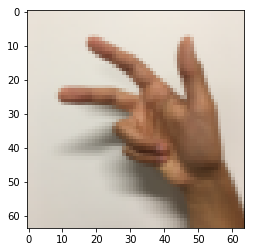

In [ ]:
show_data(100)

### Data pre-processing:
Scaling the data to keep all the pixel values between 0 and 1.

In [ ]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.

### Visualizing scalled pixel data from the 1st example of training dataset:

In [ ]:
X_train[0]

array([[[0.89019608, 0.8627451 , 0.83921569],
        [0.89019608, 0.86666667, 0.84313725],
        [0.89019608, 0.87058824, 0.84313725],
        ...,
        [0.90980392, 0.90196078, 0.87843137],
        [0.90588235, 0.89803922, 0.87058824],
        [0.90196078, 0.89803922, 0.86666667]],

       [[0.89019608, 0.86666667, 0.83921569],
        [0.89019608, 0.86666667, 0.84313725],
        [0.89411765, 0.86666667, 0.84313725],
        ...,
        [0.90980392, 0.90196078, 0.87843137],
        [0.90588235, 0.89803922, 0.87058824],
        [0.90588235, 0.89803922, 0.86666667]],

       [[0.89019608, 0.86666667, 0.83921569],
        [0.89019608, 0.86666667, 0.83921569],
        [0.89019608, 0.86666667, 0.84313725],
        ...,
        [0.90980392, 0.90196078, 0.87843137],
        [0.90588235, 0.89803922, 0.8745098 ],
        [0.90196078, 0.89803922, 0.86666667]],

       ...,

       [[0.46666667, 0.31764706, 0.2       ],
        [0.48627451, 0.33333333, 0.21568627],
        [0.49803922, 0

### Performing One hot encoding:
#### One hot encoding:
A one hot encoding is a representation of categorical variables as binary vectors.

This first requires that the categorical values be mapped to integer values.

Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

If we have 3 classes(`'red', 'red', 'green'`) in any problem, then we can represent them as `[0,0,1]`.

But in One-hot encoding, this is represented as,

`[1,0,0]` for `red`

`[1,0,0]` for `red`

`[0,0,1]` for `green`

#### Why Use a One Hot Encoding?

Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

We could use an integer encoding directly, rescaled where needed. This may work for problems where there is a natural ordinal relationship between the categories, and in turn the integer values, such as labels for temperature ‘cold’, warm’, and ‘hot’.

There may be problems when there is no ordinal relationship and allowing the representation to lean on any such relationship might be damaging to learning to solve the problem. An example might be the labels ‘dog’ and ‘cat’

In these cases, we would like to give the network more expressive power to learn a probability-like number for each possible label value. This can help in both making the problem easier for the network to model. When a one hot encoding is used for the output variable, it may offer a more nuanced set of predictions than a single label.



In [ ]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [ ]:
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

In [ ]:
print("Result of One-hot encoding of 1st training examples " + str(Y_train[0]))
print("Result of One-hot encoding of 1st test examples " + str(Y_test[0]))

Result of One-hot encoding of 1st training examples [0. 0. 0. 0. 0. 1.]
Result of One-hot encoding of 1st test examples [1. 0. 0. 0. 0. 0.]


### Data Preprocessing:
Scaling the Train and Test data between 0 to 1, so dividing these data with 255.

In [ ]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


### Creating Tensorflow placeholders:

    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
        
    Returns:
    X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float

In [ ]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):

    X = tf.placeholder(tf.float32, [None, n_H0, n_W0, n_C0])
    Y = tf.placeholder(tf.float32, [None, n_y])
    
    return X, Y

In [ ]:
X, Y = create_placeholders(64, 64, 3, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(?, 64, 64, 3), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(?, 6), dtype=float32)


### Initializing Parameters:
    
    
    Initializes weight parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [4, 4, 3, 8]
                        W2 : [2, 2, 8, 16]
    Returns:
    parameters -- a dictionary of tensors containing W1, W2
    

In [ ]:
def initialize_parameters():
    
    tf.set_random_seed(1)

    W1 = tf.get_variable("W1", [4, 4, 3, 8], initializer=tf.contrib.layers.xavier_initializer(seed=0))
    W2 = tf.get_variable("W2", [2, 2, 8, 16], initializer=tf.contrib.layers.xavier_initializer(seed=0))

    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [ ]:
tf.reset_default_graph()
with tf.Session() as sess_test:
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sess_test.run(init)
    print("W1 = " + str(parameters["W1"].eval()[1,1,1]))
    print("W2 = " + str(parameters["W2"].eval()[1,1,1]))

W0831 05:11:44.404834 139727774410624 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W1 = [ 0.00131723  0.1417614  -0.04434952  0.09197326  0.14984085 -0.03514394
 -0.06847463  0.05245192]
W2 = [-0.08566415  0.17750949  0.11974221  0.16773748 -0.0830943  -0.08058
 -0.00577033 -0.14643836  0.24162132 -0.05857408 -0.19055021  0.1345228
 -0.22779644 -0.1601823  -0.16117483 -0.10286498]


### Calculating Forward Propagation:
    
**Implementing the forward propagation for the model**:

**CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED**
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing our parameters "W1", "W2"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    

In [ ]:
def forward_propagation(X, parameters):
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # CONV2D: stride of 1, padding 'SAME'
    Z1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding='SAME')
    # RELU
    A1 = tf.nn.relu(Z1)
    # MAXPOOL: window 8x8, sride 8, padding 'SAME'
    P1 = tf.nn.max_pool(A1, ksize = [1, 8, 8, 1], strides = [1, 8, 8, 1], padding='SAME')
    # CONV2D: filters W2, stride 1, padding 'SAME'
    Z2 = tf.nn.conv2d(P1, W2, strides=[1, 1, 1, 1], padding='SAME')
    # RELU
    A2 = tf.nn.relu(Z2)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.nn.max_pool(A2, ksize = [1, 4, 4, 1], strides = [1, 4, 4, 1], padding='SAME')
    # FLATTEN
    P2 = tf.contrib.layers.flatten(P2)
    # FULLY-CONNECTED without non-linear activation function
    # 6 neurons in output layer. Hint: one of the arguments should be "activation_fn=None" 
    Z3 = tf.contrib.layers.fully_connected(P2, 6, activation_fn=None)

    return Z3

In [ ]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(Z3, {X: np.random.randn(2,64,64,3), Y: np.random.randn(2,6)})
    print("Z3 = " + str(a))

W0831 05:11:44.497904 139727774410624 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/layers/python/layers/layers.py:1634: flatten (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.flatten instead.


Z3 = [[ 1.4416982  -0.24909675  5.4504995  -0.26189643 -0.2066989   1.3654672 ]
 [ 1.4070848  -0.02573231  5.0892797  -0.48669893 -0.40940714  1.2624854 ]]


### Calculating Cost:
   
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (number of examples, 6)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function

In [ ]:
def compute_cost(Z3, Y):
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3, labels=Y))
    
    return cost

In [ ]:
tf.reset_default_graph()

with tf.Session() as sess:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    init = tf.global_variables_initializer()
    sess.run(init)
    a = sess.run(cost, {X: np.random.randn(4,64,64,3), Y: np.random.randn(4,6)})
    print("cost = " + str(a))

W0831 05:11:44.969911 139727774410624 deprecation.py:323] From <ipython-input-72-23835f61c9cf>:3: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



cost = 4.6648703


### Creating Mini-Batches:
Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples) (m, Hi, Wi, Ci)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples) (m, n_y)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    

In [ ]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):

    
    m = X.shape[0]  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:,:,:]
    shuffled_Y = Y[permutation,:]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

### Creating the model:

**Implementing a three-layer ConvNet in Tensorflow**:

**CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED**
    
    Arguments:
    X_train -- training set, of shape (None, 64, 64, 3)
    Y_train -- test set, of shape (None, n_y = 6)
    X_test -- training set, of shape (None, 64, 64, 3)
    Y_test -- test set, of shape (None, n_y = 6)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    train_accuracy -- real number, accuracy on the train set (X_train)
    test_accuracy -- real number, testing accuracy on the test set (X_test)
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

In [ ]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.009,
          num_epochs = 1000, minibatch_size = 64, print_cost = True):
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of the correct shape
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)

    # Initialize parameters
    parameters = initialize_parameters()
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z3 = forward_propagation(X, parameters)
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z3, Y)
    
    # Backpropagation: Define the tensorflow optimizer. Using an AdamOptimizer that minimizes the cost.
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Selecting a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                # Running the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                _ , temp_cost = sess.run([optimizer, cost], feed_dict={X:minibatch_X, Y:minibatch_Y})
                
                minibatch_cost += temp_cost / num_minibatches
                

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per hundreds)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # Calculate the correct predictions
        predict_op = tf.argmax(Z3, 1)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return train_accuracy, test_accuracy, parameters

### Training the Model:

Cost after epoch 0: 1.921332
Cost after epoch 100: 0.997713
Cost after epoch 200: 0.767211
Cost after epoch 300: 0.661776
Cost after epoch 400: 0.599643
Cost after epoch 500: 0.573793
Cost after epoch 600: 0.582103
Cost after epoch 700: 0.567776
Cost after epoch 800: 0.582168
Cost after epoch 900: 0.534871


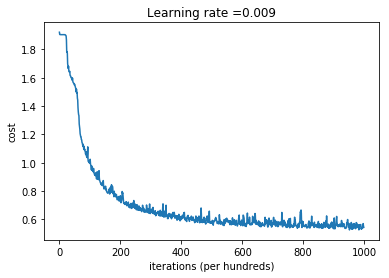

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.82222223
Test Accuracy: 0.69166666


In [ ]:
_, _, parameters = model(X_train, Y_train, X_test, Y_test)

We've got a perfect training curve, i.e. cost vs epochs curve. This means the model is well optimized.

# Keras - Implementation:

![alt text](https://datascience-enthusiast.com/figures/house-members.png)

## Creating a model that can classify whether a man is Happy or not.

In [ ]:
import numpy as np
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPooling2D
#from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
#from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


### Loading Dataset

In [ ]:
def load_dataset():
    train_dataset = h5py.File('train_happy.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_happy.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [ ]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

### Visualizing Raw Pixel data from the 1st training example

In [ ]:
X_train_orig[0]

array([[[178, 190, 163],
        [172, 181, 173],
        [188, 196, 184],
        ...,
        [255, 255, 254],
        [254, 255, 250],
        [249, 253, 222]],

       [[184, 201, 165],
        [149, 154, 142],
        [149, 158, 139],
        ...,
        [255, 255, 253],
        [254, 255, 250],
        [251, 255, 230]],

       [[198, 207, 165],
        [141, 147, 128],
        [168, 184, 154],
        ...,
        [253, 255, 244],
        [254, 255, 248],
        [253, 255, 233]],

       ...,

       [[ 77,  82,  89],
        [ 60,  64,  68],
        [ 49,  53,  55],
        ...,
        [ 31,  32,  30],
        [ 47,  48,  46],
        [ 75,  75,  75]],

       [[ 68,  71,  76],
        [ 55,  58,  59],
        [ 44,  47,  47],
        ...,
        [ 30,  31,  29],
        [ 40,  41,  39],
        [ 63,  64,  63]],

       [[ 61,  64,  66],
        [ 52,  54,  54],
        [ 45,  47,  46],
        ...,
        [ 30,  31,  29],
        [ 38,  38,  36],
        [ 56,  56,  54]]

### Performing Post-processing:
Scaling the data to keep all the pixel values between 0 and 1.

In [ ]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.

### Visualizing scalled pixel data from the 1st training example

In [ ]:
X_train[0]

array([[[0.69803922, 0.74509804, 0.63921569],
        [0.6745098 , 0.70980392, 0.67843137],
        [0.7372549 , 0.76862745, 0.72156863],
        ...,
        [1.        , 1.        , 0.99607843],
        [0.99607843, 1.        , 0.98039216],
        [0.97647059, 0.99215686, 0.87058824]],

       [[0.72156863, 0.78823529, 0.64705882],
        [0.58431373, 0.60392157, 0.55686275],
        [0.58431373, 0.61960784, 0.54509804],
        ...,
        [1.        , 1.        , 0.99215686],
        [0.99607843, 1.        , 0.98039216],
        [0.98431373, 1.        , 0.90196078]],

       [[0.77647059, 0.81176471, 0.64705882],
        [0.55294118, 0.57647059, 0.50196078],
        [0.65882353, 0.72156863, 0.60392157],
        ...,
        [0.99215686, 1.        , 0.95686275],
        [0.99607843, 1.        , 0.97254902],
        [0.99215686, 1.        , 0.91372549]],

       ...,

       [[0.30196078, 0.32156863, 0.34901961],
        [0.23529412, 0.25098039, 0.26666667],
        [0.19215686, 0

### Reshaping the train and test data by taking their transpose:

In [ ]:
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

### Number of training & testing examples:

In [ ]:
print ("Number of training examples = " + str(len(X_train)))
print ("Number of test examples = " + str(len(X_test)))

Number of training examples = 600
Number of test examples = 150


### Shape of training & testing examples:

In [ ]:
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


### Creating Model using Padding:

In [ ]:
def keras_model(input_shape):

    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)
    
    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)
    
    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    
    # MAXPOOL
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    
    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool')(X)
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)
    
    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='keras_model')
    

    return model

In [ ]:
Model = keras_model(X_train.shape[1:])

W0831 05:54:54.936635 139635340552064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0831 05:54:54.976177 139635340552064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0831 05:54:54.998240 139635340552064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0831 05:54:55.041786 139635340552064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:190: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0831 05:54:55.044647 1396353405

### Compiling the model:

In [ ]:
Model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

W0831 05:55:00.598044 139635340552064 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0831 05:55:00.630164 139635340552064 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Training the model:

In [ ]:
history = Model.fit(X_train, Y_train, epochs = 100, batch_size = 40)

Epoch 1/100
600/600 [==============================] - 3s 5ms/step - loss: 2.5868 - acc: 0.5417
Epoch 2/100
600/600 [==============================] - 0s 387us/step - loss: 0.8137 - acc: 0.7350
Epoch 3/100
600/600 [==============================] - 0s 358us/step - loss: 0.3999 - acc: 0.8550
Epoch 4/100
600/600 [==============================] - 0s 358us/step - loss: 0.3128 - acc: 0.8867
Epoch 5/100
600/600 [==============================] - 0s 362us/step - loss: 0.2313 - acc: 0.8967
Epoch 6/100
600/600 [==============================] - 0s 360us/step - loss: 0.1736 - acc: 0.9417
Epoch 7/100
600/600 [==============================] - 0s 354us/step - loss: 0.0993 - acc: 0.9783
Epoch 8/100
600/600 [==============================] - 0s 361us/step - loss: 0.0802 - acc: 0.9767
Epoch 9/100
600/600 [==============================] - 0s 368us/step - loss: 0.0752 - acc: 0.9817
Epoch 10/100
600/600 [==============================] - 0s 371us/step - loss: 0.0700 - acc: 0.9817
Epoch 11/100
600/600 

### Summarizing the model:

In [ ]:
Model.summary()

Model: "keras_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             

# Building a Residual Network

In ResNets, a "shortcut" or a "skip connection" allows the gradient to be directly backpropagated to earlier layers:

![alt text](https://raw.githubusercontent.com/tejaslodaya/keras-signs-resnet/master/images/skip_connection_kiank.png)

The image on the left shows the "main path" through the network. The image on the right adds a shortcut to the main path. By stacking these ResNet blocks on top of each other, we can form a very deep network. 

ResNet blocks with the shortcut also makes it very easy for one of the blocks to learn an identity function. 

This means that we can stack on additional ResNet blocks with little risk of harming training set performance. 

* In case of main connection, i.e. without skip connection, the network behaves like this-

  $a^{[l]}$---> Linear ---> $ReLU$ --> $a^{[l+1]}$ --> Linear --> $ReLU$ --> $a^{[l+2]}$

 Suppose the first layer shown in the figure above for without skip connection is $(l+1)^{th}$ layer. So, 

  * $z^{[l+1]} = w^{[l+1]}a^{[l]}+b^{[l+1]}$ and
 
    $a^{[l+1]}=g(z^{[l+1]})$

  * $z^{[l+2]} = w^{[l+2]}a^{[l+1]}+b^{[l+2]}$ and
 
    $a^{[l+2]}=g(z^{[l+2]})$
 
* In case of skip connection, the network behaves like this-

  * $a^{[l+2]}=g(z^{[l+2]}+a^{[l]})$

Two main types of blocks are used in a **ResNet**, depending mainly on whether the input/output dimensions are same or different.
1. Identity Block
2. Convolution Block

We are going to implement both of them. 

## The identity block
The identity block is the standard block used in ResNets, and corresponds to the case where the input activation (say $a^{[l]}$) has the same dimension as the output activation (say $a^{[l+2]}$). 

To flesh out the different steps of what happens in a ResNet's identity block, here is an alternative diagram showing the individual steps:

![alt text](https://datascience-enthusiast.com/figures/idblock2_kiank.png)

The upper path is the "shortcut path." The lower path is the "main path." 

In this diagram, we have also made explicit the CONV2D and ReLU steps in each layer. 

To speed up training we have also added a BatchNorm step.

## The convolutional block
We can use this type of block when the input and output dimensions don't match up. The difference with the identity block is that there is a CONV2D layer in the shortcut path:

![alt text](https://user-images.githubusercontent.com/6441756/33685068-3f7ed2da-da85-11e7-8ee9-98f13dff8556.png)

The CONV2D layer in the shortcut path is used to resize the input $x$ to a different dimension, so that the dimensions match up in the final addition needed to add the shortcut value back to the main path. (This plays a similar role as the matrix $W_s$) 

For example, to reduce the activation dimensions's height and width by a factor of 2, we can use a $1*1$ convolution with a stride of 2. The CONV2D layer on the shortcut path does not use any non-linear activation function. It's main role is to just apply a (learned) linear function that reduces the dimension of the input, so that the dimensions match up for the later addition step. 


# Detection Algorithm

## Object Localization

To learn Object detection,we've to first learn about object localization.

![alt text](https://adeshpande3.github.io/assets/Localization.png)

In case of object classification, we've just figured out whether the image is of a particular object or not.

In case of Object localization, we just not only figure out whether the image is of a particular object or not, but we also draw a bounding box around the object. This tells us where in the picture is the object is detected.

Now suppose, we have to build an autonomous car. So we've to localize these following objects from the image-
1. Pedestrian
2. Car
3. Motorcycle
4. Background, i.e. none of above

So, if there is car in the image & we want to localize that, then we do the following,

**Input Image --> ConvNet --> Flattened 1D matrix --> Softmax Classification + $b_x, b_y, b_h, b_w$**

For localization we make the nural network to give output of 4 more numbers- $b_x, b_y, b_h, b_w$. These number parameterize the bounding box of the detected object. Where-

* $b_x, b_y$ = Mid-point of the rectangle.

* $b_h, b_w$ = Height & Width of the Bounding Box.

### How we define the taget level(y) in training set for supervised learning ?


$ y = \begin{bmatrix}
  p_c \\
  b_x \\
  b_y \\
  b_h \\
  b_w \\
  c_1 \\
  c_2 \\
  c_3 \\
 \end{bmatrix}$
 
where,
* $p_c$ tell us whether there is any object in the image.
* $b_x, b_y, b_h, b_w$ identify the coordinates related to the bounding box around the detected object to localize it.
* $c_1, c_2, c_3$ tell us of which class the object belongs to. Here we have 3 classes - Pedestrian, Car, Motorcycle.

Here we're assuming our image has only one object.

Now **if the object in the image is a car**, then 
$ y = \begin{bmatrix}
  1 \\
  b_x \\
  b_y \\
  b_h \\
  b_w \\
  0 \\
  1 \\
  0 \\
 \end{bmatrix}$
 
where,
* $p_c=1$ as there is a car in the image.
* $b_x, b_y, b_h, b_w$ exists as there is an object to localize.
* $c_2=1$ & $c_1=c_3=0$ as the car belongs to the 2nd class.

Now **if the object in the image is a car**, then
$ y = \begin{bmatrix}
  0 \\
  ? \\
  ? \\
  ? \\
  ? \\
  ? \\
  ? \\
  ? \\
 \end{bmatrix}$

where,
* $p_c=0$ as there is no object in the image.
* Rest of the parameters are 'don't care' i.e. denoted by '?'.




## Landmark Detection

Suppose we've a facial image of a human being and we want to detect eyes from the face. 

Then how do we do that?

For that we use landmark detection. Where rather than localizing, we detect different part of the object.

Here is an image that shows different facial landmarks.
![alt text](https://fiverr-res.cloudinary.com/images/t_main1,q_auto,f_auto/gigs/118915922/original/c6aba283b52adad81979ba784d28dd0bee98e98e/prepare-facial-landmark-detection-dataset.jpeg)

Now suppose we've 64 facial landmarks. Thses landmarks can be defined as 

$ y = \begin{bmatrix}
  l_{1x} & l_{1y} \\
  l_{2x} & l_{2y} \\
  l_{3x} & l_{3y} \\
  \vdots & \vdots \\
  l_{64x} & l_{64y} \\
 \end{bmatrix}$

where $l_{nx}$ (where $n = 1 \cdots 64$) defines the position of each landmark with respect to $x-y$ co-ordinate.

So to detect landmark we'll be doing the following-

**Image --> ConvNet --> Flattened 1D matrix i.e. $ y = \begin{bmatrix}
  face? \\
  l_{1x} \\
  l_{1y} \\
  \vdots \\
  l_{64x} \\
  l_{64y} \\
 \end{bmatrix}$ i.e 129 output sample ($64*2$ facial landmarks + 1 that is used to classify a face in the image)**




## Object Detection
Suppose we want to detect a car from an image.

So to do that we should have a labelled training set of cropped images of cars. 

We need crooped images so that we can feed $x$ using only the images of cars, not with the background. 

Then we'll label those images using $1$ and $0$. Where presence of car is defined by $1$.

Then we'll train this data using ConvNet and it'll output $y$ i.e. $0$ or $1$

### Sliding Window detection:

![alt text](https://raw.githubusercontent.com/PnYuan/Practice-of-Machine-Learning/master/imgs/object_detect/concept_sliding_windows.gif)

As we can see this is a picture of a car. This red squared box which is sliding arond the image is called a window. This window sees whether there is any car in the region of the classified image that is covered by it.

We run sliding window multiple times over the image with different window size, from smaller to larger, hoping a window size would fit the car and will be able to detect the car.

Computational cost is a huge disadvantage of sliding window algorithm. We have to crop so many regions and run convnet for each of them individually. Increasing window and stride size makes it faster but at cost of decreased accuracy.

To get rid of this problem we implement convolution in sliding windows detection algorithm.

### Convolution implementation of Sliding Window detection:

This image below shows the process of turning Fully Connected Flattened layer into Convolutional Layer:

 ![alt text](https://lh3.googleusercontent.com/bCI3umjFXETlD813JzX5c3Of4opdU-WqMo9iKzFN8ALr2hIAguKibB7x4wVrAMT_EvLGsjpqWzTDzng-SQlVJ1VzhC8qwmuyEHZgg5HEIUklXs_zqr9GIA2w62WEQ9iY9MK5ikOERg=w2400)

  Previously we implemented a Fully Connected layer of 400 pixels from $5*5*16$ convolution layer that we got after performing $2*2$ pooling.
  
  Now,
  * We've applied 400 $5*5*16$ filters with the output that we received after applying Maxpooling. So we received $1*1*400$ sized convolution layer. 
  * Then again we're applying a filter of $1*1*400$ and getting a $1*1*400$ sized convolution layer.
  * Now again we're applying 4 $1*1$ filter and getting a $1*1*4$ sized convolution layer.
  
How Convolution implementation of Sliding Window detection works ?
  
![alt text](https://slideplayer.com/slide/10395667/35/images/26/Efficient+Sliding+Window%3A+Overfeat.jpg)

* At the top row of convolution implementation, we can see the after applying ConvNet the input image of $14*14*3$ returning a output of image $1*1*4$.
* At the middle row of convolution implementation,
  * We have $16*16*3$ input image, where the size of the window is $14*14*3$.
  * We are using stride of $1$, so the window will slide $4$ times in the input image(2 horizontaly & 2 verticaly).
  * Thus it'll return us $2*2$ output. As the window image which is coloured in blue is in top-right corner of the input image, the output is showing accordingly.
  
Using convolution, instead of applying ConvNet several time for detection, we can do the same all at time.

## YOLO

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/12/Screenshot-from-2018-11-15-17-46-32.png)

Here segmenting this image in 9 seperate bounding boxes($3*3$) for accurate classification & localization.

Now we'll be applying image classification & localization algorithm to each of the 9 grid.

So labels of training for each grid cell for 3 classes(Pedestrian, Class, Motorcycle) will be- $ y = \begin{bmatrix}
  p_c \\
  b_x \\
  b_y \\
  b_h \\
  b_w \\
  c_1 \\
  c_2 \\
  c_3 \\
 \end{bmatrix}$

As we can see, $y$ is a 8-Dimensional output vector. So our target output will be $3*3*8$.
Where any one $1*1*8$ dimensional vector of the $3*3*8$ represents any one bounding box of that particular image.

In one word, we can say we have an i/p image($x$) of $100*100*3$ dimension. We'll be applying ConvNet to get output($y$) of $3*3*8$ dimension.

### Intersection Over Union(IoU):
IoU is a measure of the overlap between 2 bounding boxes.

To check whether our Object Detection Algorithm is working well or not we use this algorithm.

If our calculated bounding box's position is not equals to the original bounding box's position then we divide the area of intersection or overlap by area of union

![alt text](https://www.pyimagesearch.com/wp-content/uploads/2016/09/iou_equation.png)

If the result of IoU $=$ 1 then can say the detection algorithm is doing perfectly well.

![alt text](https://www.pyimagesearch.com/wp-content/uploads/2016/09/iou_examples.png)

### Non-max Supression:
Now suppose we've segmented the above image in 19 separate bounding boxes.

So, we can say we have an i/p image($x$) of $100*100*3$ dimension. We'll be applying ConvNet to get output($y$) of $19*19*8$ dimension.

As the number of boundig boxes are more here so the number of boundig boxes covering the enitre car is more. So there might be multiple bounding boxes which overlaps with each other but loaclizes the car.

Non-max suppression suppresses those bounding boxes among many overlaped bounding boxes which IoU is less. And the bounding boxes localizing the entire car with highest IoU is kept.

![alt text](https://appsilon.com/wp-content/uploads/2018/08/nonmax-1.png)

### Anchor Boxes:
These alogrithms till now can only classify one object of one class with in a bounding box. Anchor box comes in handy when we need to classify 2 different images of 2 different classes. 

Anchor Box looks like this-

![alt text](https://www.mathworks.com/help/vision/ug/anchorbox_whatis.png)

Now suppose we have to classify a cycle and a dog with in same boundix boxes.

![alt text](https://media.graphcms.com/resize=w:1024,h:304,fit:crop/output=format:webp/compress/8uGAhsw7Q1CeSjNhw7tM)

Now the cycle looks like the Anchor box 1 and the dog looks like the Anchor box 2.

In this case, $ y = \begin{bmatrix}
  p_c \\
  b_x \\
  b_y \\
  b_h \\
  b_w \\
  c_1 \\
  c_2 \\
  c_3 \\
  p_c' \\
  b_x' \\
  b_y' \\
  b_h' \\
  b_w' \\
  c_1' \\
  c_2' \\
  c_3' \\
 \end{bmatrix}$ where $\begin{bmatrix}
  p_c \\
  b_x \\
  b_y \\
  b_h \\
  b_w \\
  c_1 \\
  c_2 \\
  c_3 \\
 \end{bmatrix}$ is for anchor box 1 and $\begin{bmatrix}
  p_c' \\
  b_x' \\
  b_y' \\
  b_h' \\
  b_w' \\
  c_1' \\
  c_2' \\
  c_3' \\
 \end{bmatrix}$ is for anchor box 2.

 Now if we have 3 classes and the dog is of class 1 and the cycle is of class 2 then $ y = \begin{bmatrix}
  1 \\
  b_x \\
  b_y \\
  b_h \\
  b_w \\
  0 \\
  1 \\
  0 \\
  1 \\
  b_x' \\
  b_y' \\
  b_h' \\
  b_w' \\
  1 \\
  0 \\
  0 \\
 \end{bmatrix}$



# Face Recognition
## One shot learning:
In this case, we only use one training example of a human face to train the ConvNet.

Now suppose we have to recognise multiple faces and to do that we have 4 faces of 4 different people - $a,b,c,d$. We have to feed those 4 faces with ConvNet and we will get some output.

Now suppose the face $a$ is front facing and we have an unknown face, i.e. $a_1$ which is nothing but the side face of $a$. So it is obvious the difference of the output after feeding those images to ConvNet will be minimum.

Now what one shot learning does is when an unkown face comes to be recognised that face is also undergoes through ConvNet and one shot learning finds the similarity of that unknown face with the other faces that are being trained in the network. If the similarity level of 2 faces matches or crosses a particular threshould value, then this algorithm tells us that those 2 faces are of same people.

### Siamese Network:
Now suppose we're feeding $a$ to a ConvNet and giving output of 128 vectors i.e. $f(a)$.

Now we're feeding another face $b$ to a ConvNet and this also gives us 128 vectors as an output i.e. $f(b)$.

Now we'll find the differences between these 2 vectors i.e. $d(a,b)=||f(a)-f(b)||^2$

The algorithm of Siamese Network is if the images $a$ & $b$ are of same person, then $d(a,b)$ will be less & if they are of different person, $d(a,b)$ will be high.

### Triplet Loss
This is a function where we need three images to define it, one is Anchor($A$) image, another is abbreviated as anchor positive($P$) and anchor negetive($N$). 

For the above examples, Anchor is $a$, anchor positive is $a_1$ & anchor negetive is $b$.

Now if we define Triplet Loss on these 3 images, we'll get-
$L(a,a_1,b)=max((||f(a)-f(a_1)||^2-||f(a)-f(b)||^2+\alpha$),0) where, $\alpha$ is known as Margin. If $\alpha$ is set to 0.2, then $||f(a)-f(a_1)||^2-||f(a)-f(b)||^2 \geq 0.2$. That means if $||f(a)-f(a_1)||^2=0.5$ then $||f(a)-f(b)||^2$ will be $\geq 0.7$.

To implement this loss function only a single image of a person will not do the job. We need multiple images of Anchor($A$) & Anchor Positive($P$) to train the network for this loss function.

